In [267]:
import numpy as np 
import pandas as pd 
import scipy
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn import model_selection 
from sklearn.metrics import accuracy_score
from sklearn import preprocessing # for scale

import pickle
import importlib

import finalproj as fp
import corinne

In [241]:
importlib.reload(fp)
importlib.reload(corinne)

<module 'corinne' from '/Users/andrewenfield/work/github/Data558/Kaggle/corinne.py'>

In [17]:
features_train = np.array(pickle.load(open('features_train', 'rb')))
labels_train = np.array(pickle.load(open('labels_train', 'rb')))
print(len(features_train), len(labels_train))

4320 4320


In [182]:
X_scaled = preprocessing.scale(features_train)
X_scaled.shape

(4320, 2048)

_Pick two classes of your choice from the dataset. Train an L2-regularized logistic regression classiﬁer on the training set using your own fast gradient algorithm with λ = 1. Plot, with diﬀerent colors, the misclassiﬁcation error on the training set and on the validation set vs iterations._

I'll pick 086, Pacific Loon, and 087, Mallard, as the two classes.

Note that I interpret the question as saying that we should consider each observation in the two chosen classes as a positive example, and all other observations as negative examples. 

Side note: it seems like this gives us a class imbalance problem, because we have 4260 negative examples of 4320. This means that we could predict -1 for all observations and get an accuracy of 98.6%/misclassification error of 1.4%.

In [23]:
y_actual = np.where((labels_train == '086.Pacific_Loon') | (labels_train == '087.Mallard'), 1, -1)
sum(y_actual == 1), sum(y_actual == -1)

(60, 4260)

In [192]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_scaled, y_actual, test_size=0.3, random_state=48)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3024, 2048), (1296, 2048), (3024,), (1296,))

In [193]:
# positive examples in the train and test sets
sum(y_train == 1), sum(y_test == 1)

(40, 20)

In [194]:
t_init = 0.01
max_iters = 100

In [195]:
results = fp.fastgradalgo(
    X_train, y_train, t_init=t_init, 
    grad_func = fp.compute_gradient_logistic_regression, 
    obj_func = fp.compute_objective_logistic_regression, 
    lam=1, max_iter=max_iters)
results[-3:]

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
98,-0.004016,-0.003430,0.000517,-0.000092,-0.001432,-0.000109,-0.001791,0.001266,0.002640,-0.000864,...,0.001409,-0.004484,-0.003668,0.000416,-0.000109,-0.002647,0.000518,0.000029,0.001801,0.000733
99,-0.004016,-0.003431,0.000518,-0.000092,-0.001434,-0.000111,-0.001790,0.001268,0.002640,-0.000864,...,0.001410,-0.004484,-0.003668,0.000417,-0.000110,-0.002646,0.000519,0.000030,0.001801,0.000734
100,-0.004017,-0.003431,0.000520,-0.000092,-0.001435,-0.000112,-0.001788,0.001270,0.002639,-0.000863,...,0.001411,-0.004483,-0.003669,0.000418,-0.000110,-0.002646,0.000520,0.000030,0.001801,0.000735


In [196]:
def get_accuracy(beta_coefs, X, y_actual, prob_threshold=0.5):
    """
    Return the classification accuracy given a set of coefficients, in 
    beta_coefs, and observations, in X, compared to actual/known values 
    in y_actual. The threshold parameter defines the value above which the
    predicted value is considered a positive example.
    """
    y_pred = X.dot(beta_coefs.T).ravel() # ravel to convert to vector
    
    # works for linear svm where output doesn't have an additional meaning?
    # convert to -1 or +1 depending on threshold
    #y_thresholded = np.where(y_pred > threshold, 1, -1)
    
    # but for logistic regression, we want to convert to a prob and use a prob threshold?
    probs = np.exp(y_pred) / (1 + np.exp(y_pred))
    y_thresholded = np.where(probs > prob_threshold, 1, -1)
    
    return accuracy_score(y_actual, y_thresholded)

In [198]:
# note use of the held out test data to get the performance metrics
accuracy = get_accuracy(fp.get_final_coefs(results), X_test, y_test)
print("Accuracy: {0:.1%}".format(accuracy))
print("Misclassification error: {0:.1%}".format(1 - accuracy))

Accuracy: 52.5%
Misclassification error: 47.5%


In [199]:
results.shape

(101, 2048)

In [200]:
results_by_iteration = results.values.dot(X_train.T)
results_by_iteration.shape

(101, 3024)

In [201]:
results_by_iteration[100,:]

array([-0.27152144, -0.02342079, -0.18907889, ..., -0.0091657 ,
        0.03402183, -0.19663518])

In [202]:
np.where(y_actual == 1)

(array([1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690,
        1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701,
        1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712,
        1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723,
        1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734,
        1735, 1736, 1737, 1738, 1739]),)

In [203]:
results_by_iteration[100, 1675:1745]

array([ -1.70305078e-01,   5.99739271e-02,   6.04341591e-01,
         2.34140404e-02,  -1.54613677e-01,  -5.54592525e-02,
        -1.59407318e-01,  -3.65047490e-01,  -4.77503696e-02,
         4.83947705e-02,  -4.41670973e-02,  -7.55176601e-02,
        -1.72494543e-01,  -2.91916582e-01,  -3.68969085e-02,
        -8.70336140e-02,  -1.85482064e-01,   4.86754848e-02,
        -4.49810038e-02,   9.68328811e-01,  -5.87041397e-02,
        -1.30939003e-01,   7.42119365e-02,   6.24310055e-02,
        -1.26547494e-01,  -4.00845767e-02,   1.07726383e-01,
        -1.06569678e-01,   8.04520249e-04,  -5.72924371e-03,
         1.32978185e-02,   2.65595901e-02,   6.08157437e-01,
        -1.04938013e-01,   7.47071378e-02,   4.08167945e-03,
        -1.59602301e-03,  -1.22696249e-01,  -4.10871364e-02,
        -2.51757238e-01,   2.74006974e-01,  -7.16138809e-02,
        -1.06629644e-01,  -1.34026498e-01,   2.00777131e-01,
        -1.42245267e-01,  -9.00301300e-02,  -1.81389932e-01,
        -4.40749948e-02,

In [204]:
iteration = 50
#results_by_iteration[iteration, 1675:1745]
np.exp(results_by_iteration[iteration, 1675:1745]) / (1 + np.exp(results_by_iteration[iteration, 1675:1745])) 

array([ 0.45720419,  0.51452731,  0.64669452,  0.50604715,  0.46176632,
        0.48642153,  0.46024098,  0.41180512,  0.4875016 ,  0.51255692,
        0.48879431,  0.48133008,  0.45710647,  0.42840824,  0.49003873,
        0.47818404,  0.45375849,  0.51233252,  0.48909477,  0.72376389,
        0.48456364,  0.46719967,  0.51931951,  0.51569047,  0.46844394,
        0.4900618 ,  0.52684053,  0.47447976,  0.50051628,  0.49877893,
        0.50344635,  0.50785894,  0.64781645,  0.4741087 ,  0.51902399,
        0.50164983,  0.50003143,  0.46983186,  0.49019703,  0.43830778,
        0.56755209,  0.4823599 ,  0.4728081 ,  0.46634482,  0.55108226,
        0.46380083,  0.47769432,  0.45580026,  0.48861996,  0.47319851,
        0.45499663,  0.47570406,  0.47647608,  0.48023941,  0.54947195,
        0.42232352,  0.47753863,  0.53312923,  0.48674174,  0.60635732,
        0.47642364,  0.52291062,  0.45823378,  0.43307289,  0.45377261,
        0.48995587,  0.44894167,  0.47471226,  0.52172729,  0.44

In [220]:
accuracy = get_accuracy(results.values[20,:], X_test, y_test, 0.5)
print("Accuracy: {0:.1%}".format(accuracy))
print("Misclassification error: {0:.1%}".format(1 - accuracy))

Accuracy: 53.0%
Misclassification error: 47.0%


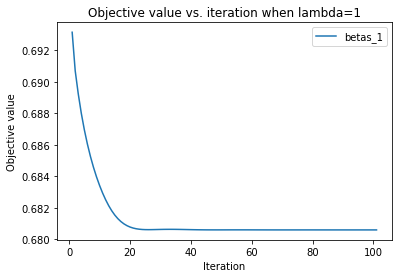

In [243]:
corinne.objective_plot(results.values, 1, X_train, y_train)

In [248]:
results_corinne, thetas_corinne = corinne.fastgradalgo(np.zeros(X_train.shape[1]),
                                       np.zeros(X_train.shape[1]),
                                       1,
                                       0.01,
                                       100,
                                       X_train,
                                       y_train)
results_corinne.shape

Fast gradient iteration 100


(101, 2048)

In [250]:
results_corinne

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -1.99682301e-04,  -1.09313709e-04,  -8.02460742e-05, ...,
          1.23307473e-04,   3.67999397e-05,  -4.99477375e-05],
       [ -3.63295384e-04,  -2.16952494e-04,  -1.32288192e-04, ...,
          2.01673270e-04,   7.13951772e-05,  -7.15946903e-05],
       ..., 
       [ -4.01553603e-03,  -3.43040245e-03,   5.16718208e-04, ...,
          2.87920988e-05,   1.80055744e-03,   7.32757170e-04],
       [ -4.01596705e-03,  -3.43067501e-03,   5.18232219e-04, ...,
          2.96547532e-05,   1.80096975e-03,   7.33815025e-04],
       [ -4.01676438e-03,  -3.43110868e-03,   5.19754980e-04, ...,
          3.02342403e-05,   1.80128781e-03,   7.35009997e-04]])

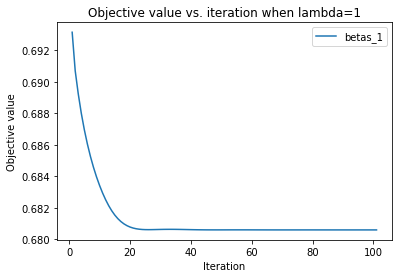

In [251]:
corinne.objective_plot(results_corinne, 1, X_train, y_train)

In [254]:
corinne.compute_misclassification_error(results_corinne[100,:], X_test, y_test)

0.47530864197530864

In [256]:
corinne.compute_misclassification_error(results.values[100,:], X_test, y_test)

0.47530864197530864

In [264]:
results_corinne[2,:]

array([ -3.63295384e-04,  -2.16952494e-04,  -1.32288192e-04, ...,
         2.01673270e-04,   7.13951772e-05,  -7.15946903e-05])

In [263]:
results.values[2, :]

array([ -3.63295384e-04,  -2.16952494e-04,  -1.32288192e-04, ...,
         2.01673270e-04,   7.13951772e-05,  -7.15946903e-05])

In [271]:
lambduh = 1
d = X_train.shape[1]
beta_init = np.zeros(d)
theta_init = np.zeros(d)
eta_init = 1/(scipy.linalg.eigh(1/len(y_train)*X_train.T.dot(X_train), 
                                eigvals=(d-1, d-1), eigvals_only=True)[0]+lambduh)
maxiter = 300
#betas_grad = corinne.graddescent(beta_init, lambduh, eta_init, maxiter, X_train, y_train)
betas_fastgrad, thetas_fastgrad = corinne.fastgradalgo(beta_init, theta_init, lambduh, eta_init, maxiter,
                                                       X_train, y_train)
betas_fastgrad.shape
#objective_plot(betas_grad, betas_fastgrad, lambduh, save_file='hw3_q1_part_h_output.png')


Fast gradient iteration 100
Fast gradient iteration 200
Fast gradient iteration 300


(301, 2048)

In [274]:
betas_fastgrad[-1:]

array([[ -4.03362426e-03,  -3.43958460e-03,   5.21826364e-04, ...,
          2.31106829e-05,   1.79956585e-03,   7.42056345e-04]])

In [275]:
corinne.compute_misclassification_error(betas_fastgrad[-1,:], X_test, y_test)

0.47530864197530864

Ok, so, bottom line, we get the same results from our code as we do from Corinne's code, even when we use the exact same setup/init code (for ex, that sets eta_init using X.T.dot(X)), and when we use Corinne's code that does backtracking compared to our code, above, where we're not using backtracking. I think this is good enough for me to accept that w/ a lambda of 1 at least, logistic regression is way worse than just returning negative all the time.

What do we see when we use our backtracking impl?

In [288]:
results = fp.fastgradalgo(
    X_train, y_train, t_init=t_init, 
    grad_func = fp.compute_gradient_logistic_regression, 
    obj_func = fp.compute_objective_logistic_regression, 
    lam=1, max_iter=100)
results[-3:]

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
98,-0.004016,-0.003430,0.000517,-0.000092,-0.001432,-0.000109,-0.001791,0.001266,0.002640,-0.000864,...,0.001409,-0.004484,-0.003668,0.000416,-0.000109,-0.002647,0.000518,0.000029,0.001801,0.000733
99,-0.004016,-0.003431,0.000518,-0.000092,-0.001434,-0.000111,-0.001790,0.001268,0.002640,-0.000864,...,0.001410,-0.004484,-0.003668,0.000417,-0.000110,-0.002646,0.000519,0.000030,0.001801,0.000734
100,-0.004017,-0.003431,0.000520,-0.000092,-0.001435,-0.000112,-0.001788,0.001270,0.002639,-0.000863,...,0.001411,-0.004483,-0.003669,0.000418,-0.000110,-0.002646,0.000520,0.000030,0.001801,0.000735


In [298]:
results = fp.fastgradalgo(
    X_train, y_train, t_init=t_init, 
    grad_func = fp.compute_gradient_logistic_regression, 
    obj_func = fp.compute_objective_logistic_regression, 
    lam=1, max_iter=300, t_func=fp.backtracking)
results[-3:]

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
298,-0.004036,-0.003443,0.000523,-0.000098,-0.001434,-0.000093,-0.001795,0.00128,0.002664,-0.000864,...,0.001422,-0.004515,-0.00369,0.00042,-0.000109,-0.002671,0.000507,0.000022,0.001799,0.000741
299,-0.004036,-0.003443,0.000523,-0.000098,-0.001434,-0.000093,-0.001795,0.00128,0.002664,-0.000864,...,0.001422,-0.004515,-0.00369,0.00042,-0.000109,-0.002671,0.000507,0.000022,0.001799,0.000741
300,-0.004036,-0.003443,0.000523,-0.000098,-0.001434,-0.000093,-0.001795,0.00128,0.002664,-0.000864,...,0.001422,-0.004515,-0.00369,0.00042,-0.000109,-0.002671,0.000507,0.000022,0.001799,0.000741


In [299]:
corinne.compute_misclassification_error(results.values[-1,:], X_test, y_test)

0.47530864197530864

In [300]:
1 - get_accuracy(results.values[-1,:], X_test, y_test)

0.47530864197530864

Ok, so we get the same results w/ our own backtracking implementation. Note again that since our stopping criteria is _only_ the number of iterations, we don't automatically get any benefit from the improved step sizes that backtracking gives us. That said, we still in theory could get to the minimum faster, which means if we're manually setting max_iter based on experimentation, then backtracking could help.

Finally, it's possible that backtracking adds enough processing time that we might want to run w/ it off if we're not going to use it. 

Although, backtracking might not _just_ give us better steps sizes leading to quicker convergence. It seems like it could also help us avoid the case where we _don't_ converge, if it keeps us from using a static/single step size that at some point means we're moving back and forth on our objective value without decreasing.

Bottom line, if i care, I should probably benchmark, and watch for non-convergence being fixed when we use backtracking. I'll keep that in mind.

Also, separately, it seems like my impl is way faster than Corinne's - I can run w/ 300 iterations in just a few secs while it takes her's well more than 10-20s it seems, anecdotally. It might be interesting to profile and see if a) this is really the case, and b) if so, why.

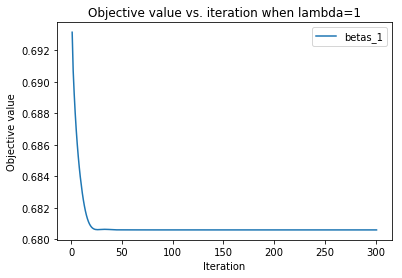

In [301]:
corinne.objective_plot(results.values, 1, X_train, y_train)

In [276]:
[fp.compute_objective_logistic_regression(coefs, X_train, y_train, 1) for coefs in results.values][:10]

[0.69314718055990943,
 0.69069840925813752,
 0.68923848668062204,
 0.68800550555072026,
 0.68695783810160649,
 0.68605473272573059,
 0.68526849901743814,
 0.68457882460233843,
 0.68396918396901918,
 0.68342703757035017]

_Find the value of the regularization parameter λ using cross-validation; you may use scikit-learn’s built-in functions for this purpose. Train an L2-regularized logistic regression classiﬁer on the training set using your own fast gradient algorithm with that value of λ found by cross-validation. Plot, with diﬀerent colors, the misclassiﬁcation error on the training set and on the validation set vs iterations._